In [ ]:
!rm -rf /content/estresado
!rm -rf /content/llorando
!rm -rf /content/sonriendo


In [ ]:
!unzip /content/estresado -d /content/dataset/
!unzip /content/llorando -d /content/dataset/
!unzip /content/sonriendo -d /content/dataset/

Archive:  /content/estresado.zip
  inflating: /content/dataset/estresado/_113527491_gettyimages-151038056.jpg  
  inflating: /content/dataset/estresado/_116934141_gettyimages-1249628154.jpg  
  inflating: /content/dataset/estresado/_fotolia209441639subscriptionmonthlyxxl_ad04599a.jpg  
  inflating: /content/dataset/estresado/0-aC3B1os-llorando-en-casa-concepto-de-la-tristeza-gente-real-copiar-espacio.jpg  
  inflating: /content/dataset/estresado/104075.jpg  
  inflating: /content/dataset/estresado/1538-mujer20estresada.jpg  
  inflating: /content/dataset/estresado/16363686434063.jpg  
  inflating: /content/dataset/estresado/16420883670711.jpg  
  inflating: /content/dataset/estresado/2022110818131687503.jpg  
  inflating: /content/dataset/estresado/33563.jpg  
  inflating: /content/dataset/estresado/628a0ae3eebc7.r_d.2816-2282.jpeg  
  inflating: /content/dataset/estresado/6438992708a81.jpeg  
  inflating: /content/dataset/estresado/757184846_232504798_1706x960.jpg  
  inflating: /cont

In [ ]:
!ls -l

total 21124
drwxr-xr-x 5 root root     4096 May 22 22:48 dataset
-rw-r--r-- 1 root root 13616566 May 22 22:42 estresado.zip
-rw-r--r-- 1 root root   916555 May 22 22:42 llorando.zip
drwxr-xr-x 1 root root     4096 May 21 13:23 sample_data
-rw-r--r-- 1 root root  7084613 May 22 22:46 sonriendo.zip


In [ ]:
!ls /content/dataset/llorando | wc -l #475
!ls /content/dataset/estresado | wc -l #515
!ls /content/dataset/sonriendo/ | wc -l #515

45
45
46


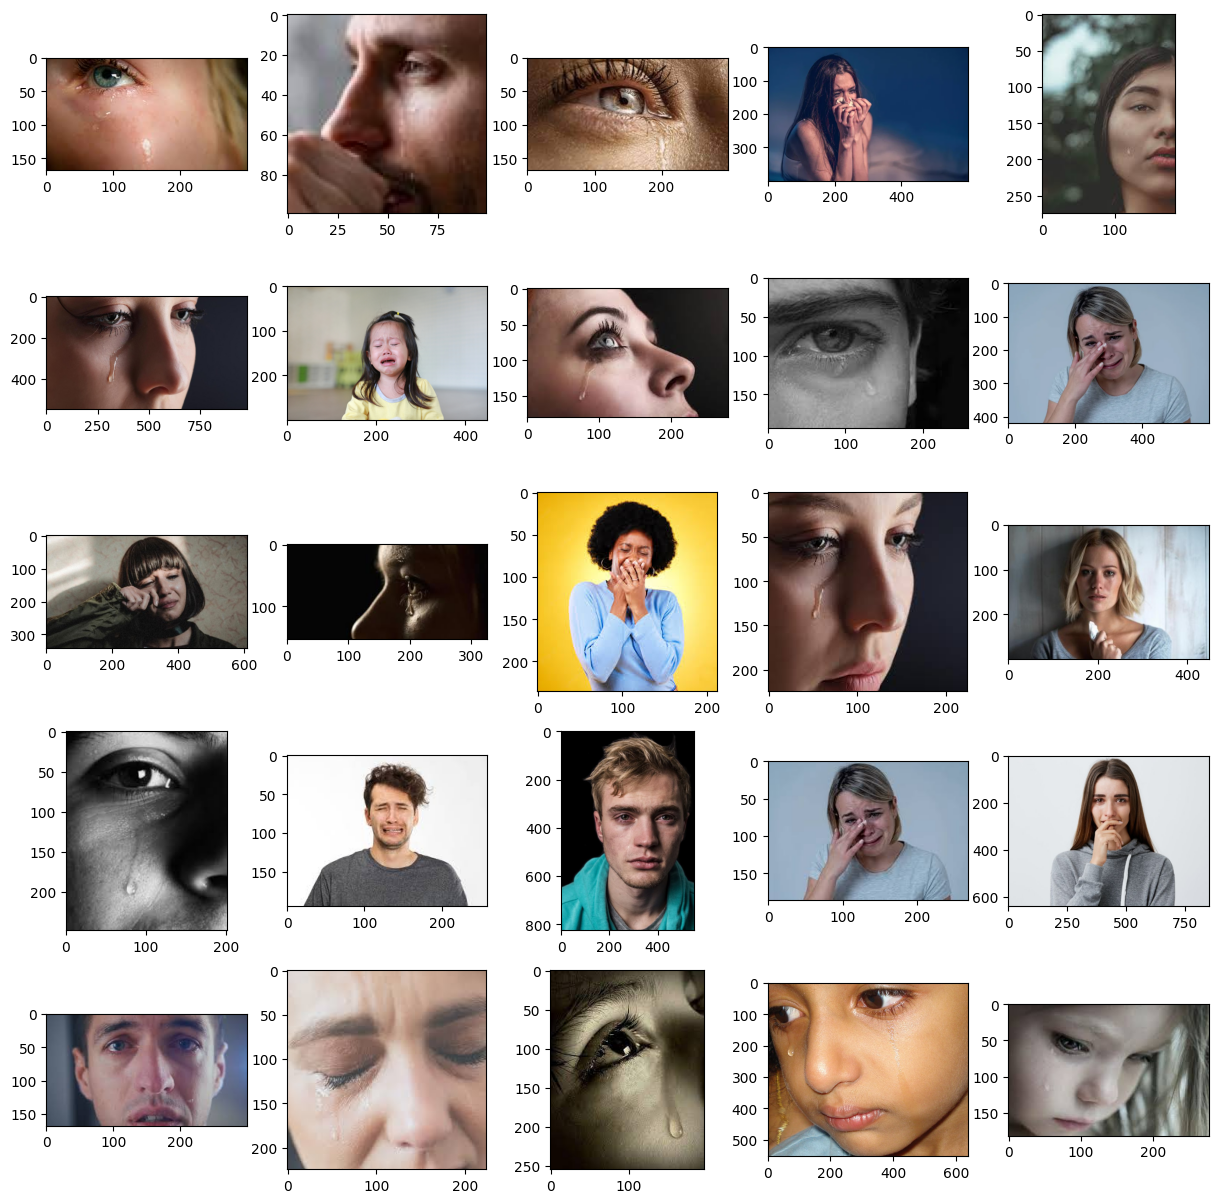

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta1 = '/content/dataset/llorando'
imagenes1 = os.listdir(carpeta1)

for i, nombreimg1 in enumerate(imagenes1[:25]):
  plt.subplot(5,5,i+1)
  imagen1 = mpimg.imread(carpeta1 + '/' + nombreimg1)
  plt.imshow(imagen1)

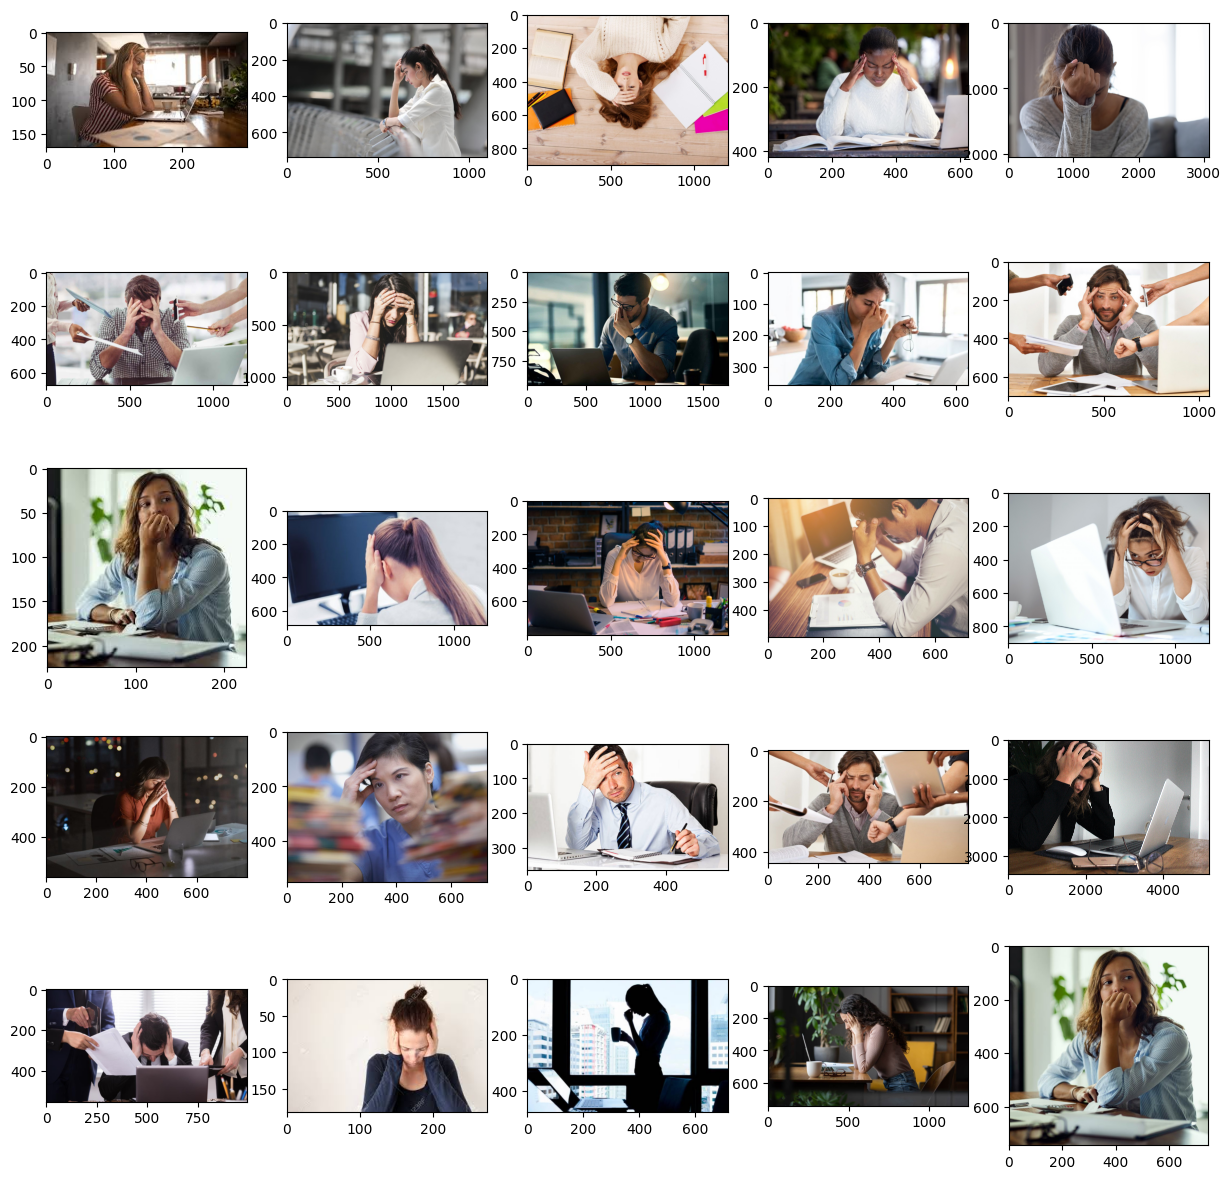

In [ ]:
plt.figure(figsize=(15,15))

carpeta2 = '/content/dataset/estresado'
imagenes2 = os.listdir(carpeta2)

for i, nombreimg2 in enumerate(imagenes2[:25]):
  plt.subplot(5,5,i+1)
  imagen2 = mpimg.imread(carpeta2 + '/' + nombreimg2)
  plt.imshow(imagen2)

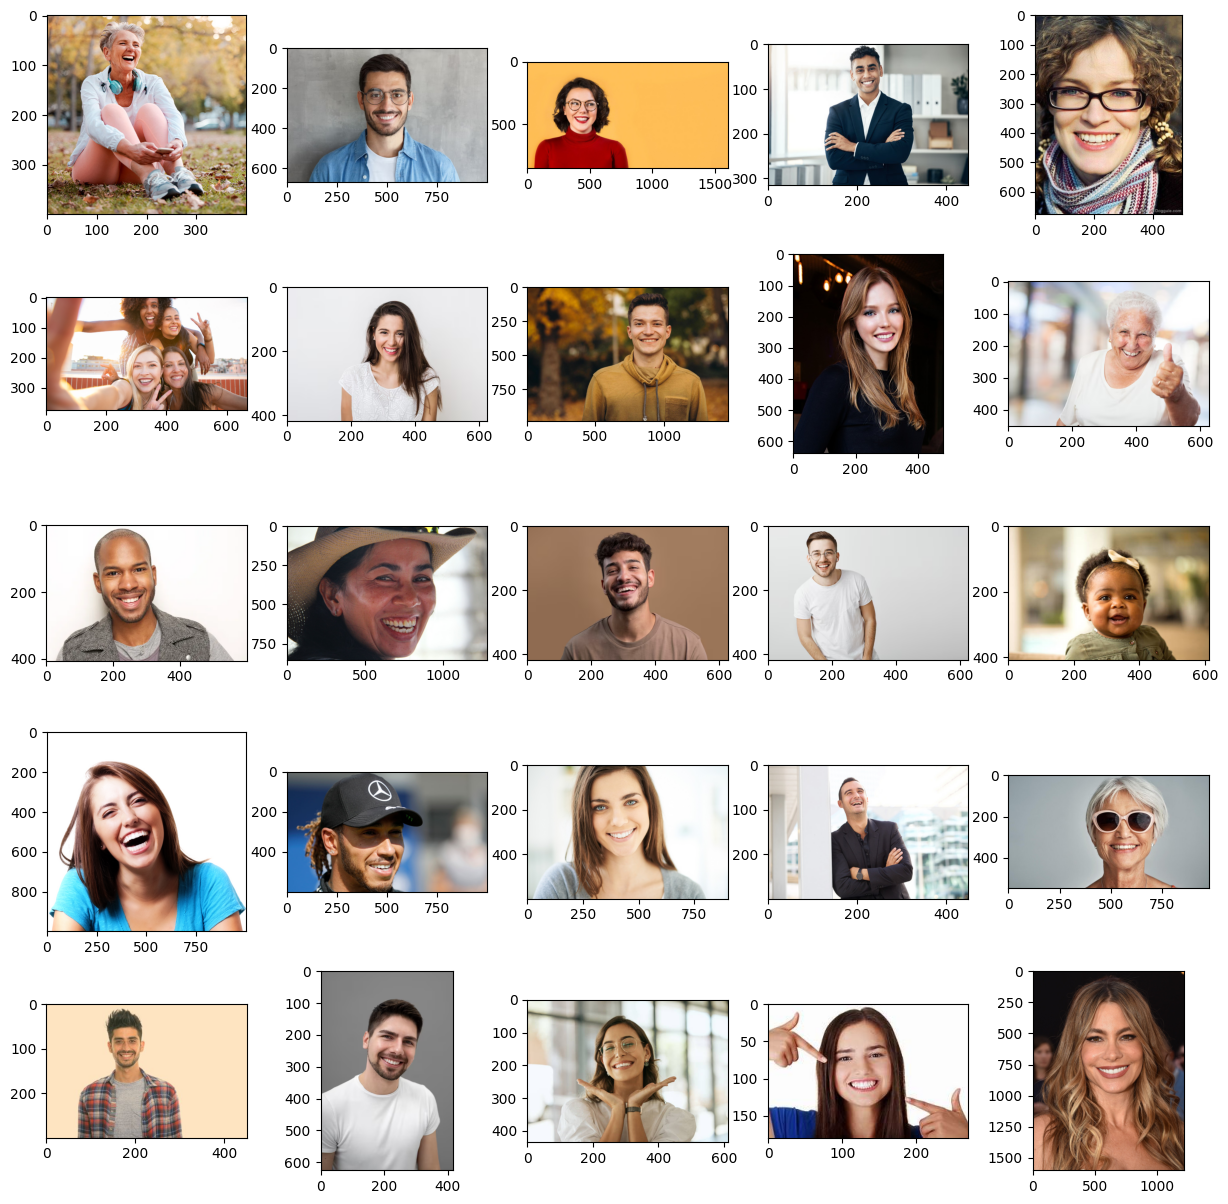

In [ ]:
plt.figure(figsize=(15,15))

carpeta3 = '/content/dataset/sonriendo'
imagenes3 = os.listdir(carpeta3)

for i, nombreimg3 in enumerate(imagenes3[:25]):
  plt.subplot(5,5,i+1)
  imagen3 = mpimg.imread(carpeta3 + '/' + nombreimg3)
  plt.imshow(imagen3)

In [8]:
!rm /content/dataset/.ipynb_checkpoints/ -r

rm: cannot remove '/content/dataset/.ipynb_checkpoints/': No such file or directory


Found 109 images belonging to 3 classes.
Found 27 images belonging to 3 classes.


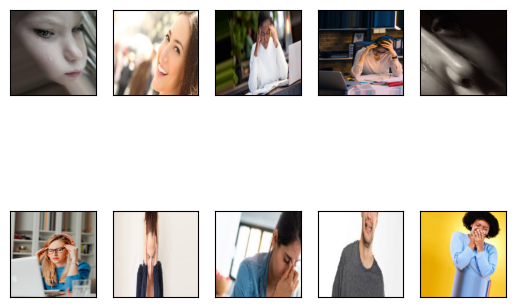

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2
)

data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [10]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [11]:
mobilenetv2.trainable = False

In [12]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [13]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [14]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
EPOCAS = 10

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/10
4/4 [==============================] - 4s 983ms/step - loss: 0.4154 - accuracy: 0.8440 - val_loss: 0.5949 - val_accuracy: 0.6667
Epoch 2/10
4/4 [==============================] - 3s 805ms/step - loss: 0.3237 - accuracy: 0.8899 - val_loss: 0.6937 - val_accuracy: 0.5926
Epoch 3/10
4/4 [==============================] - 3s 677ms/step - loss: 0.3496 - accuracy: 0.8807 - val_loss: 0.6546 - val_accuracy: 0.7037
Epoch 4/10
4/4 [==============================] - 3s 699ms/step - loss: 0.3335 - accuracy: 0.8807 - val_loss: 0.5974 - val_accuracy: 0.8519
Epoch 5/10
4/4 [==============================] - 4s 1s/step - loss: 0.3311 - accuracy: 0.8716 - val_loss: 0.6531 - val_accuracy: 0.6667
Epoch 6/10
4/4 [==============================] - 3s 702ms/step - loss: 0.2948 - accuracy: 0.8716 - val_loss: 0.6235 - val_accuracy: 0.7037
Epoch 7/10
4/4 [==============================] - 3s 682ms/step - loss: 0.3066 - accuracy: 0.8532 - val_loss: 0.6795 - val_accuracy: 0.7407
Epoch 8/10
4/4 [=======

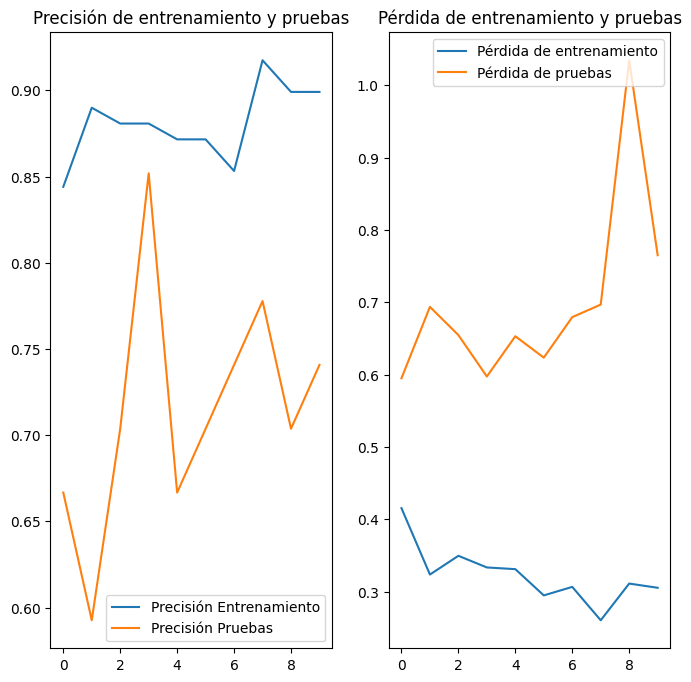

In [17]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(10)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [18]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
    respuesta = requests.get(url)
    img = Image.open(BytesIO(respuesta.content))
    img = np.array(img).astype(float) / 255

    img = cv2.resize(img, (224, 224))
    prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))

    # Obtener los valores de la predicción
    prediccion_valores = prediccion[0]

    # Verificar si todos los valores son menores a 0.5
    if np.all(prediccion_valores < 0.5):
        resultado = [3]
    else:
        # Si no, obtener la categoría con el valor más alto
        resultado = [np.argmax(prediccion_valores, axis=-1)]

    return resultado, prediccion


In [30]:
url = 'https://img.freepik.com/foto-gratis/militar-hombre-sufrimiento-ptsd_23-2149307529.jpg'
prediccion = categorizar(url)
print(prediccion)

1/1 [==============================] - 0s 137ms/step
([1], array([[0.00246373, 0.6163948 , 0.38114148]], dtype=float32))


In [20]:
modelo.save('mm/modelo_entrenado_sentimientos.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import load_model

In [24]:
with tf.keras.utils.custom_object_scope({'KerasLayer': hub.KerasLayer}):
    modelo_cargado = load_model('/content/mm/modelo_entrenado_sentimientos.h5')